# **MINI PROJECT #2**

# **KITCHEN ADDING VALUE ON AMES HOUSE BETWEEN 2007 AND 2010**

**What is the adding value of kitchen feature onto house price of Ames between 2007 and 2010?**


## SUMMARY

### Data questions
What is the adding value of kitchen feature onto house price of Ames between 2007 and 2010?

### Stake-holders
Marketing manager - House renovation company, property owners

### Objectives
This analysis examines the Ames Housing dataset and identifies what renovation features that likely bring significant adding values to the house price. In this case, we found kitchen and the basement quality as the two  features that have significant influences.

From building three linear regression models to predict the sale price and pick the best one, we found the adding value of kitchen quality quality.

By improving the kitchen quality, the house value could be increased by minimum of 12.57%. Details of adding values are as below.

The findings help renovation company as the stake-holder to design marketing strategy on their renovation services to homeowners as well as the property owners to make decision on whether or not to improve their house value before they sell their houses.

### Kitchen adding value report

### Dataset

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Train dataset (from train.csv)

Rows: 1460

Columns: 81

Duplicated rows: 0

Column names to reformat: 0 

Numerical columns: 38

Ordinal columns: 14

Nominal columns: 29

Missing value columns: 19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold 

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from scipy import stats

sns.set(color_codes = True)

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
house_raw=pd.read_csv("../.../../Data/train.csv")
house=house_raw
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA

In [3]:
house.shape

(1460, 81)

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house.duplicated().sum()

0

In [6]:
house.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460,NaN,NaN,NaN,6.32192,2.70363,1,5,6,8,12
YrSold,1460,NaN,NaN,NaN,2007.82,1.3281,2006,2007,2008,2009,2010
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# get all numerical columns
numerical_dtypes = ['int16','int32', 'int64','float16','float32','float64']
numerical_cols = []
for i in house.columns:
    if house[i].dtype in numerical_dtypes:
        numerical_cols.append(i)
        
print(len(numerical_cols))
print(numerical_cols)

38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [8]:
# get all ordinal columns

ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
len(ordinal_cols)

14

In [9]:
# get all nominal columns

nominal_cols = list(set(house.columns) - set(numerical_cols) - set(ordinal_cols))
print(len(nominal_cols))
print(nominal_cols)

# remove id columns
numerical_cols = list(filter(lambda x: (x != 'Id'), numerical_cols))

29
['Heating', 'Condition1', 'RoofMatl', 'LotConfig', 'MiscFeature', 'CentralAir', 'SaleType', 'PavedDrive', 'SaleCondition', 'LandSlope', 'RoofStyle', 'Condition2', 'Exterior1st', 'Exterior2nd', 'BldgType', 'Foundation', 'MSZoning', 'Neighborhood', 'Street', 'LandContour', 'HouseStyle', 'Alley', 'GarageFinish', 'LotShape', 'MasVnrType', 'Functional', 'Electrical', 'GarageType', 'Utilities']


# MISSING VALUES

In [10]:
# CHECK MISSING VALUES

def get_missing_values(data):
    missingValues_cols = {}
    for i in data.columns:
        if data[i].isnull().sum() > 0:
            missingValues_cols.update({i: round(data[i].isnull().mean() * 100,2)})
    missingVal_df = pd.DataFrame(missingValues_cols.items(),columns=['column_name','missing_val_percentage'])
    return missingVal_df
 
missingVal_df = get_missing_values(house)
missingVal_df

,column_name,missing_val_percentage
0,LotFrontage,17.74
1,Alley,93.77
2,MasVnrType,0.55
3,MasVnrArea,0.55
4,BsmtQual,2.53
5,BsmtCond,2.53
6,BsmtExposure,2.60
7,BsmtFinType1,2.53
8,BsmtFinType2,2.60
9,Electrical,0.07


In [11]:
### HANDLING MISSING VALUES: replace numerical values by referencing data description

# Replace null value by 0 for numerical columns
# LotFrontage: 0 means no street connected to property
# MasVnrArea: 0 means no Masonry veneer area
# GarageYrBlt: 0 means the property does not have garage

missingValues_cols = {}
for i in missingVal_df.column_name:
    if (house[i].dtype in numerical_dtypes):
        #print(i, house[i].dtype)
        house[i].fillna(0,inplace=True)
        
missingVal_df = get_missing_values(house)
missingVal_df

,column_name,missing_val_percentage
0,Alley,93.77
1,MasVnrType,0.55
2,BsmtQual,2.53
3,BsmtCond,2.53
4,BsmtExposure,2.60
5,BsmtFinType1,2.53
6,BsmtFinType2,2.60
7,Electrical,0.07
8,FireplaceQu,47.26
9,GarageType,5.55


In [12]:
### HANDLING MISSING VALUES: replace categorical values by referencing data description

# Replace 'None' to 'NA' of categorical cols indicating the property do not have that particular feature 
# such as no alley access, no masonry veneer type, no basement, no fireplace, no garage, no pool, no fence, no misc feature
# For Electrical, I decided to replace missing value by mode, the value appearing most often

house['Electrical'].fillna(house['Electrical'].mode()[0],inplace=True)

for i in missingVal_df.column_name:
    if (i in nominal_cols) | (i in ordinal_cols):
        # print(i)
        house[i] = house[i].fillna('None')

missingVal_df = get_missing_values(house)
missingVal_df

,column_name,missing_val_percentage


# Feature engineering

Calculate house age by comparing year built and year sold

Calculate year since remodelled or built to see if this feature gives any insights

From the dataset, we found that:

_ TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 + BsmUnfSF

_ GrLivArea = 1stFlrSF + 2ndFlrSF

_ TotRmsAbvGr = BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr

Split dataset to a group of houses with high overall quality (>= 6) and a group of houses with low overall quality (<6).

High quality houses have higher mean and max sale prices compared to low quality houses.

Doing Hypothesis test to check if house quality likely impacts on the house price.

Neighborhood: some areas only have high quality houses (OverallQual >= 6), indicating new developed areas include: Northridge Heights, Northpark Villa, Somerset (retirement village), Stone Brook, Bloomington Heights, Bluestem, Northridge

Houses with central air conditioning have avgPrice of 175k compared to avgPrice of 100k from houses with no air conditioning.



In [13]:
# calculate house age by comparing year built and year sold

house['Age'] = house['YrSold'] - house['YearBuilt'] 
house['YearSinceRemOrBuilt'] = house['YrSold'] - house['YearRemodAdd'] 
house['YearSinceRemOrBuilt'] = house['YrSold'] - house['YearRemodAdd'] 
house.loc[house.OverallQual >= 6,'HighQuality'] = 1
house.loc[house.OverallQual < 6,'HighQuality'] = 0


In [14]:
## Translate location column by getting the median sale price per total living area

In [15]:
# evaluate neighborhood

house['TotalLivingSF'] = house['GrLivArea'] + house['TotalBsmtSF']
neighborhood_PriceSF = house.groupby('Neighborhood')['SalePrice'].median()/house.groupby('Neighborhood')['TotalLivingSF'].median()
neighborhood_PriceSF.sort_values(ascending=False)

Neighborhood
NridgHt    90.830450
StoneBr    86.577390
Somerst    81.717702
NoRidge    79.825258
Veenker    78.080229
CollgCr    74.457240
Timber     72.693287
Gilbert    71.939587
Crawfor    71.421858
SawyerW    70.771046
Mitchel    68.161634
Blueste    67.700640
NPkVill    67.064768
Blmngtn    67.017544
ClearCr    65.731167
NWAmes     65.391491
Sawyer     65.375303
BrkSide    62.635425
NAmes      61.188811
BrDale     60.450528
Edwards    58.365292
OldTown    55.400372
SWISU      53.986068
MeadowV    53.724054
IDOTRR     52.820513
dtype: float64

In [16]:
for i in neighborhood_PriceSF.index:
    # print(i, nh_meanPriceSF[i])
    house.loc[house.Neighborhood == i,'NeighborhoodPriceSF']= neighborhood_PriceSF[i]


In [17]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age,YearSinceRemOrBuilt,HighQuality,TotalLivingSF,NeighborhoodPriceSF
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,5,5,1.0,2566,74.457240
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,31,31,1.0,2524,78.080229
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,7,6,1.0,2706,74.457240
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,91,36,1.0,2473,71.421858
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,8,8,1.0,3343,79.825258


(0.0, 11.0)

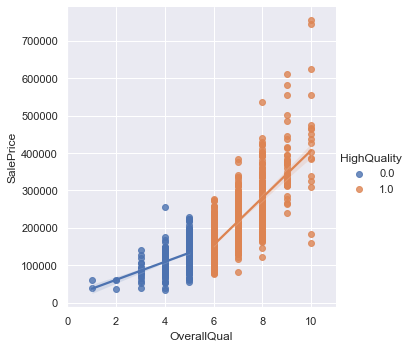

In [18]:
house_to_compare = house[(house.LotArea > 7000) & (house.LotArea < 11000)]

low_qual_house = house_to_compare[house_to_compare.OverallQual<6].sort_values('SalePrice')
high_qual_house = house_to_compare[house_to_compare.OverallQual>=6].sort_values('SalePrice')

ax = sns.lmplot(x='OverallQual',y='SalePrice',data=house, hue='HighQuality', fit_reg=True)
ax = plt.gca()
xlim = ax.get_xlim()
ax.set_xlim(0,11)

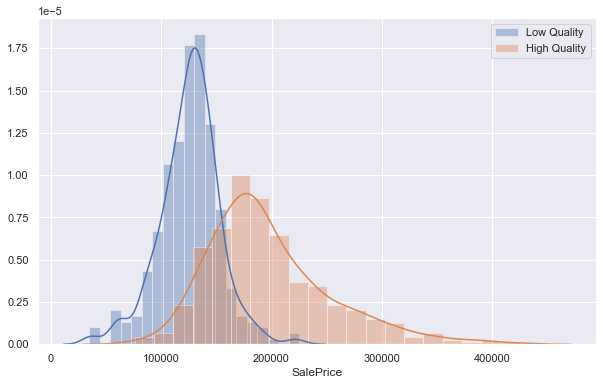

In [19]:
# COMPARE SALE PRICE
fig = plt.figure(figsize=(10, 6))
sns.distplot(low_qual_house.SalePrice, bins=20, hist=True, label='Low Quality')
sns.distplot(high_qual_house.SalePrice, bins=20, hist=True, label='High Quality')
plt.legend()

In [20]:
def plot_pair_charts(data1, data2, column_list, legend_text,fig_size):
    fig = plt.figure(figsize=fig_size)
    fig.subplots_adjust(hspace=0.6, wspace=0.5, top=0.975)
    fig.suptitle('High vs Low quality houses')

    for i, col in enumerate(list(data1[column_list]),1):
        # print(col)
        ax = fig.add_subplot(len(column_list), 3, i)
        plt.hist(data1[col],alpha=0.8)
        plt.hist(data2[col],alpha=0.8)
        plt.xlabel('{}'.format(col), size=15,labelpad=12.5)
        plt.ylabel('Frequecy', size=15, labelpad=12.5)
        plt.legend(legend_text)
        plt.xticks(rotation=45)
    
    figname = 'High vs Low quality houses.png'
    # fig.savefig(figname,transparent=False, bbox_inches='tight', dpi=300)
    
    plt.show()


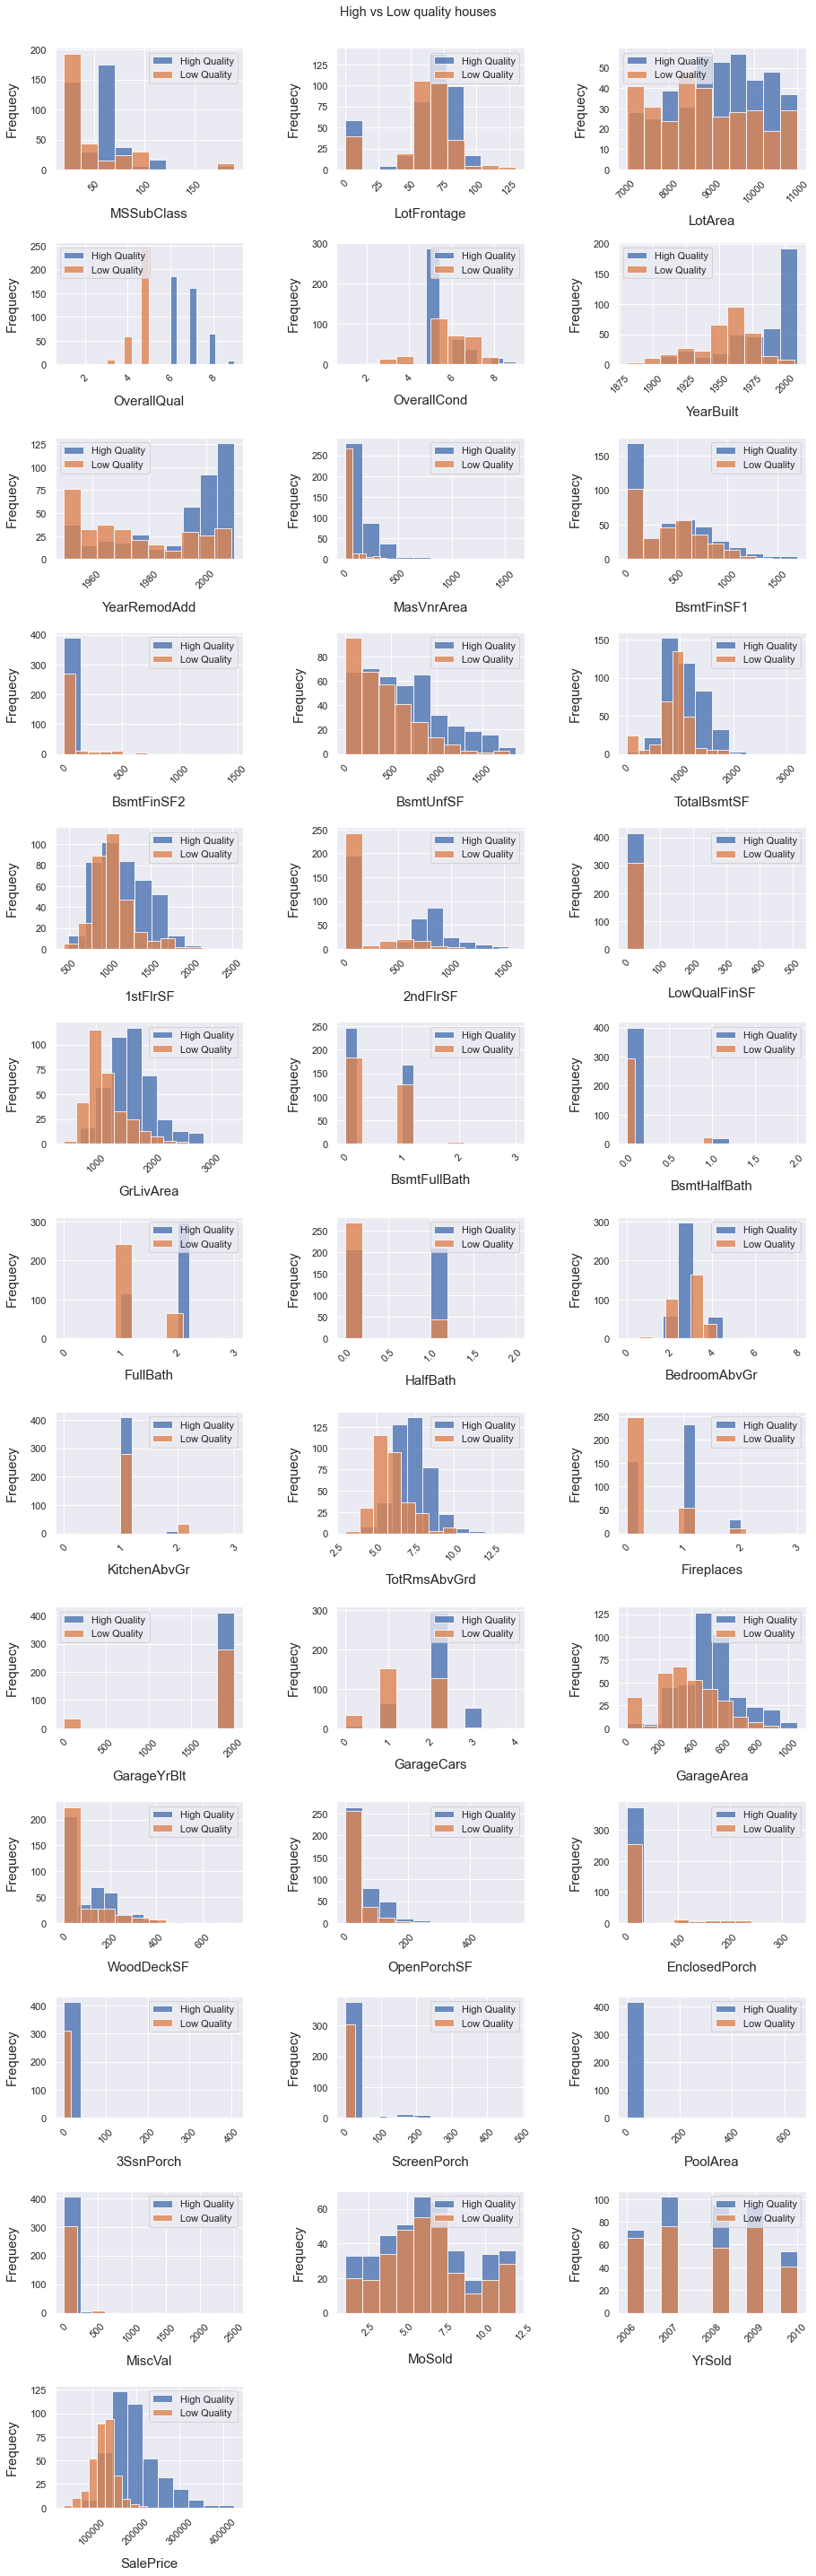

In [21]:
# plot bar charts of numerical features to compare amount of houses with high quality vs low quality
cols_to_plot = numerical_cols
plot_pair_charts(high_qual_house,low_qual_house,cols_to_plot,legend_text=['High Quality','Low Quality'],fig_size=(15, 130))   

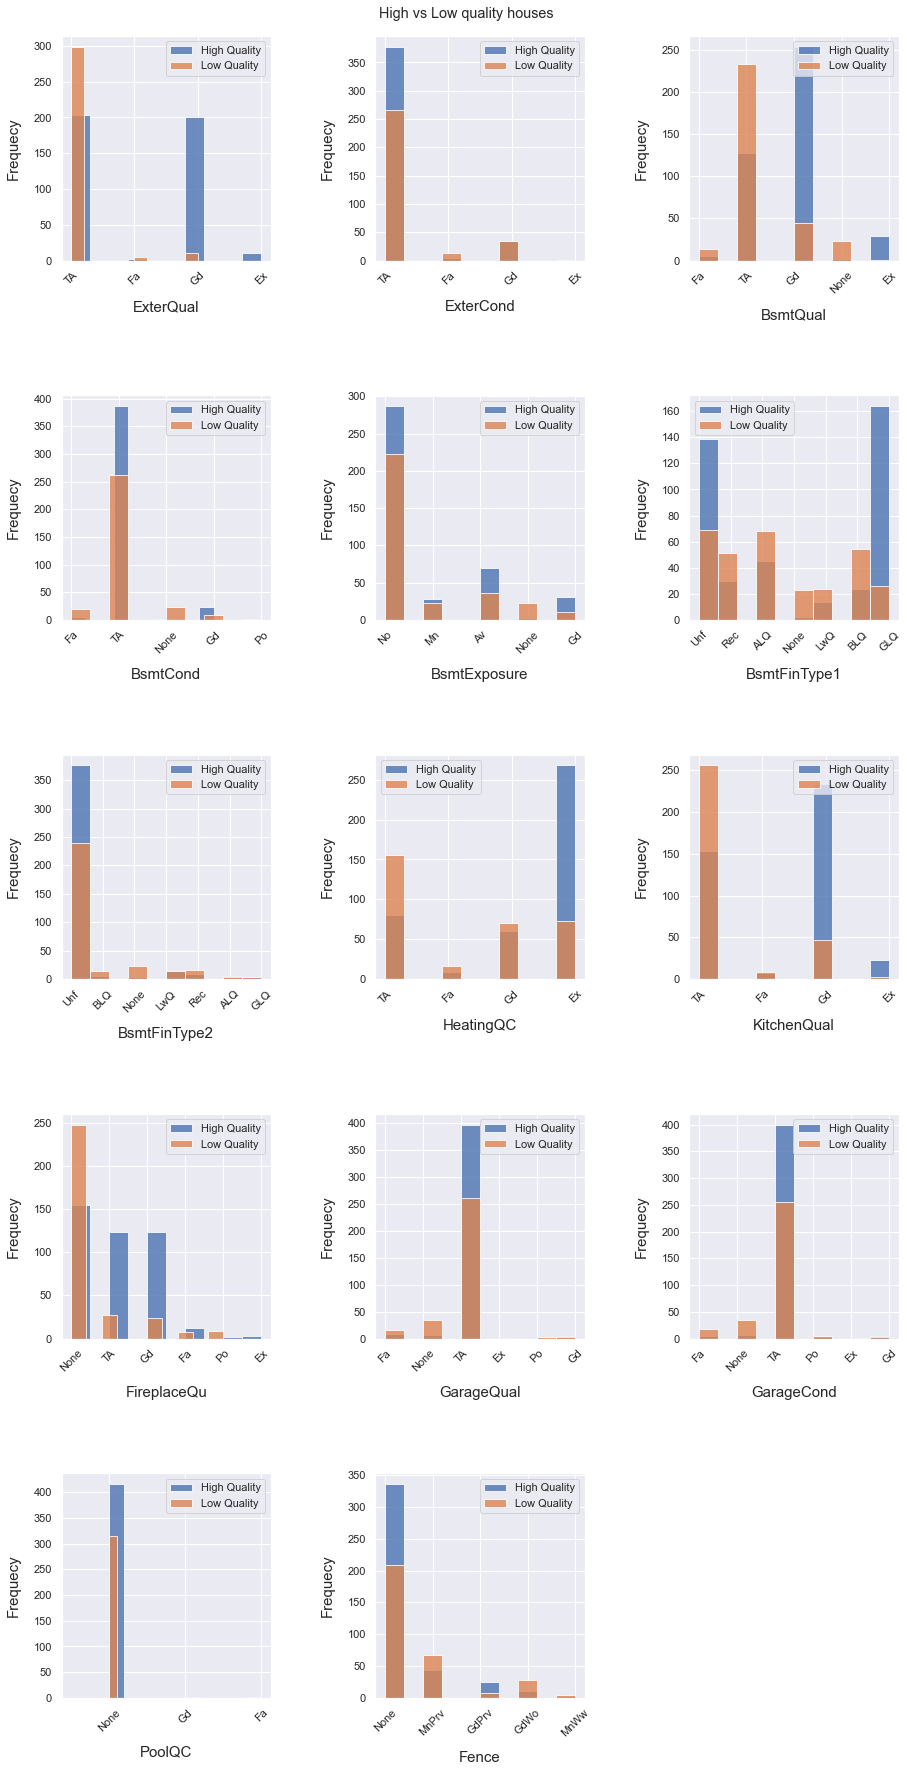

In [35]:
# plot bar charts of ordinal features to compare amount of houses with high quality vs low quality
cols_to_plot = ordinal_cols
plot_pair_charts(high_qual_house,low_qual_house,cols_to_plot,legend_text=['High Quality','Low Quality'],fig_size=(15, 80))   

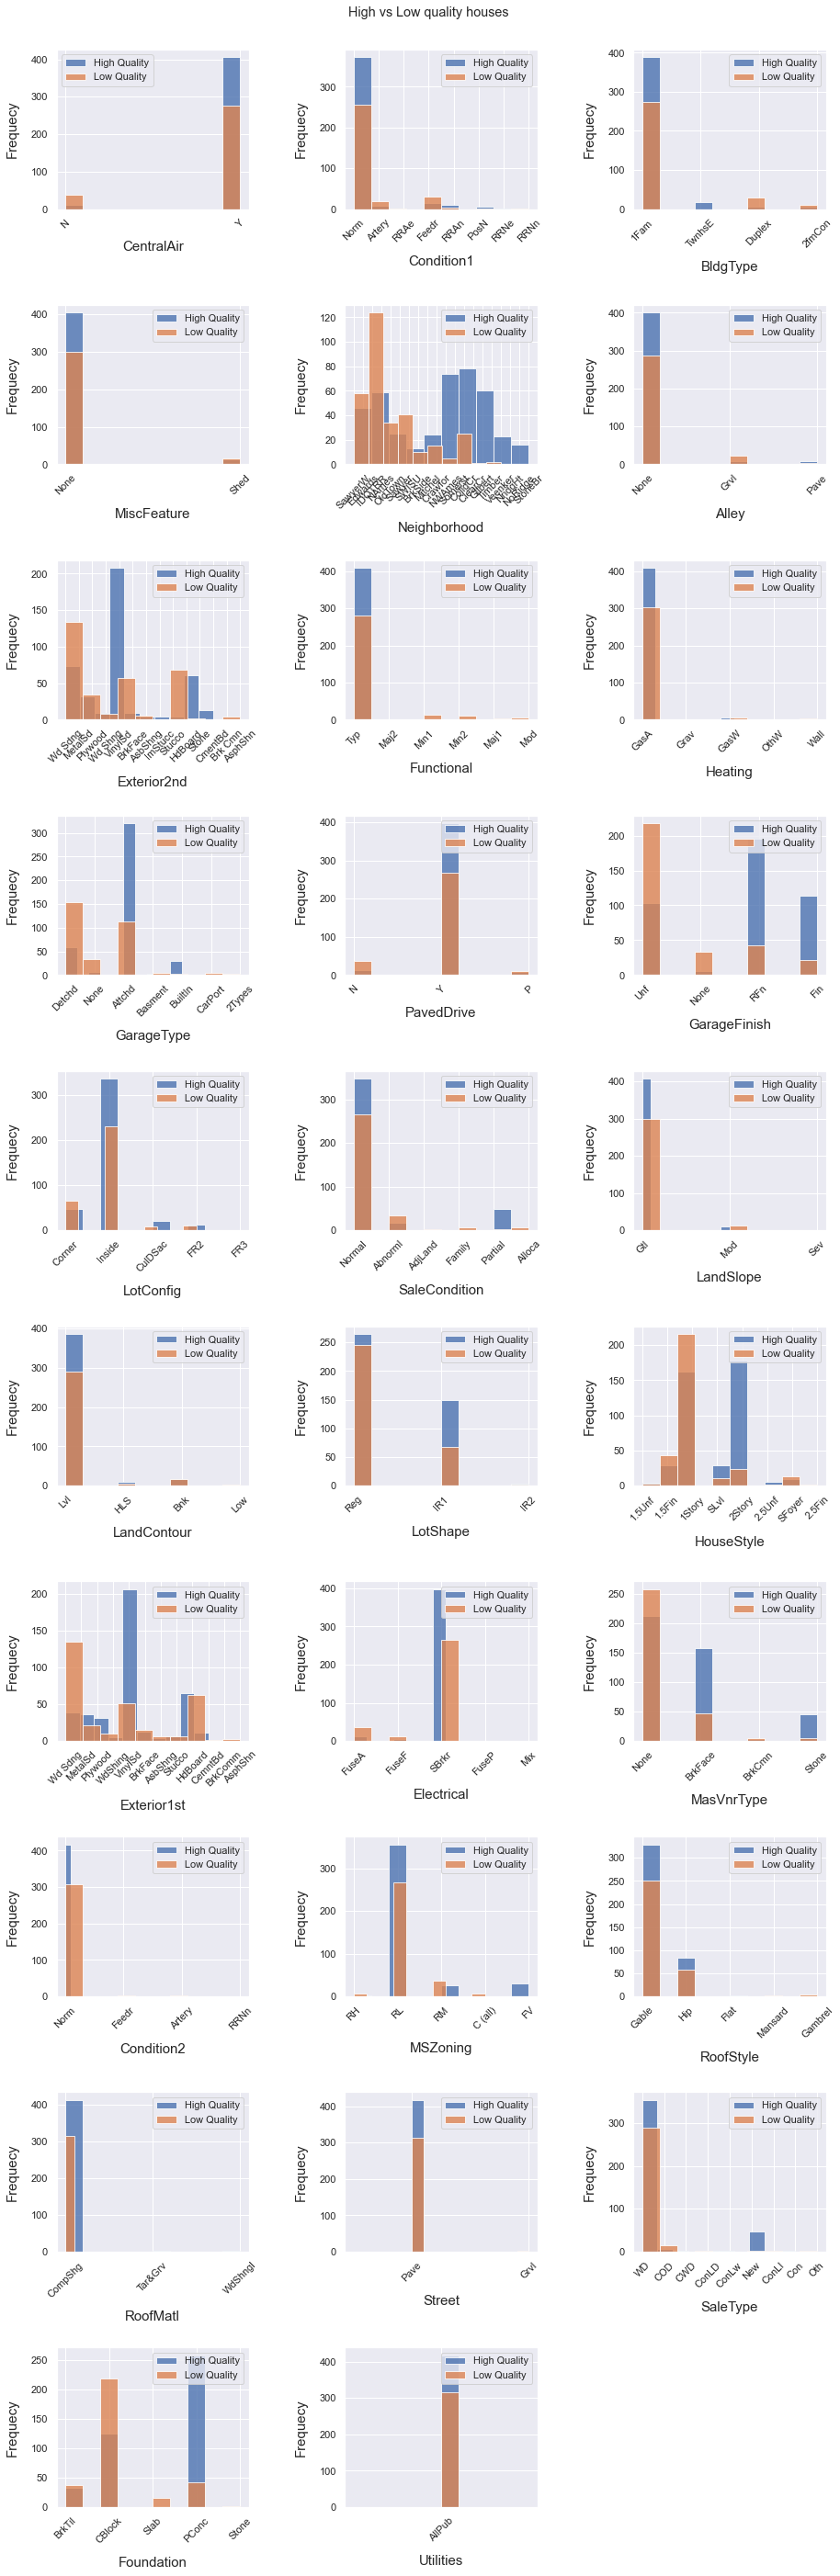

In [36]:
# plot bar charts of nominal features to compare amount of houses with high quality vs low quality
cols_to_plot = nominal_cols
plot_pair_charts(high_qual_house,low_qual_house,cols_to_plot,legend_text=['High Quality','Low Quality'],fig_size=(15, 130))   

In [38]:
# plot sale price of all numerical columns

def plot_multi_charts(data, x_column_list, y, title, y_label, plot_type, figsize):
    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.975)
    fig.suptitle(title)

    for i, col in enumerate(list(data[x_column_list]),1):
        
        ax = fig.add_subplot(len(x_column_list), 3, i)
        
        if plot_type == 'scatter':
            plt.scatter(x=data[col], y=house[y])
            plt.xlabel('{}'.format(col), size=15,labelpad=12.5)
            plt.ylabel(y_label, size=15, labelpad=12.5)
        elif plot_type == 'bar':
            data.groupby(col).agg({y:'mean'}).sort_values(by=y).plot.bar(ax=ax)
    
    figname = title + '.png'
    fig.savefig(figname,transparent=False, bbox_inches='tight', dpi=300)
    
    print('Total cols: ',len(x_column_list))    
    plt.show()
    

Total cols:  37


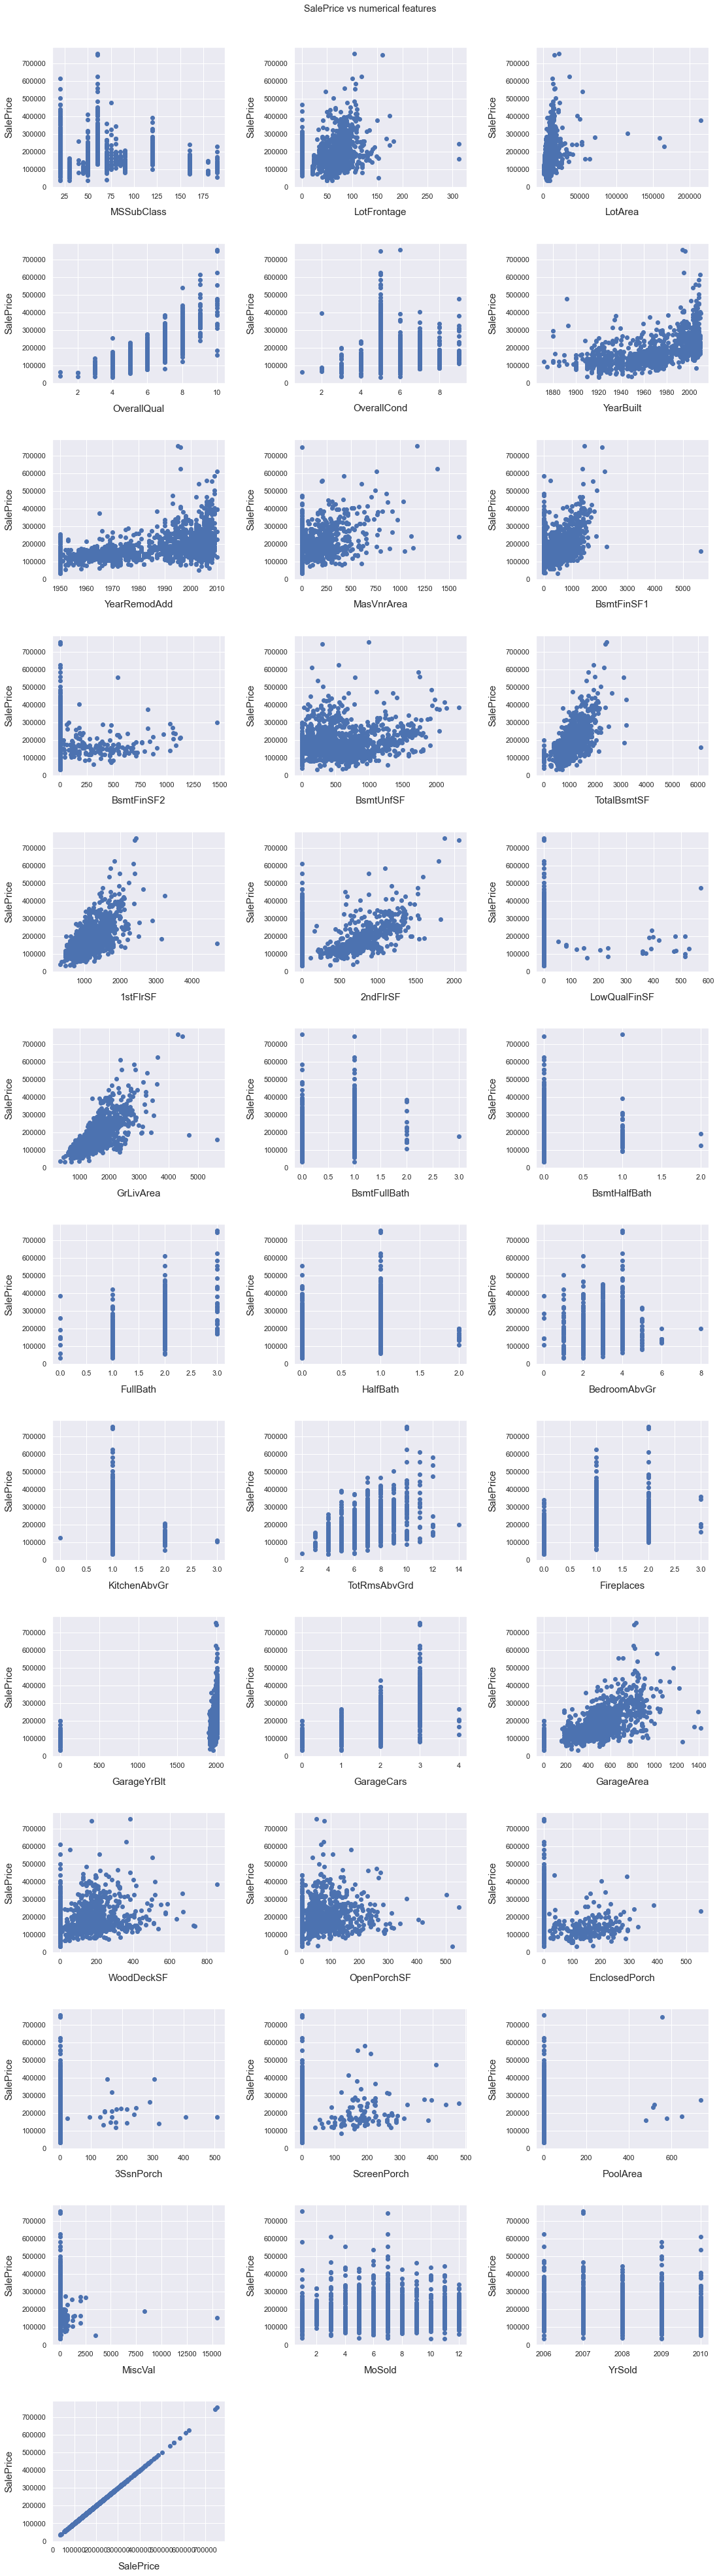

In [39]:
# Observe sale price of all numerical features

plot_multi_charts(data=house, x_column_list=numerical_cols,y='SalePrice', 
                  title='SalePrice vs numerical features',y_label='SalePrice',plot_type='scatter',figsize=(18,180))    

Total cols:  29


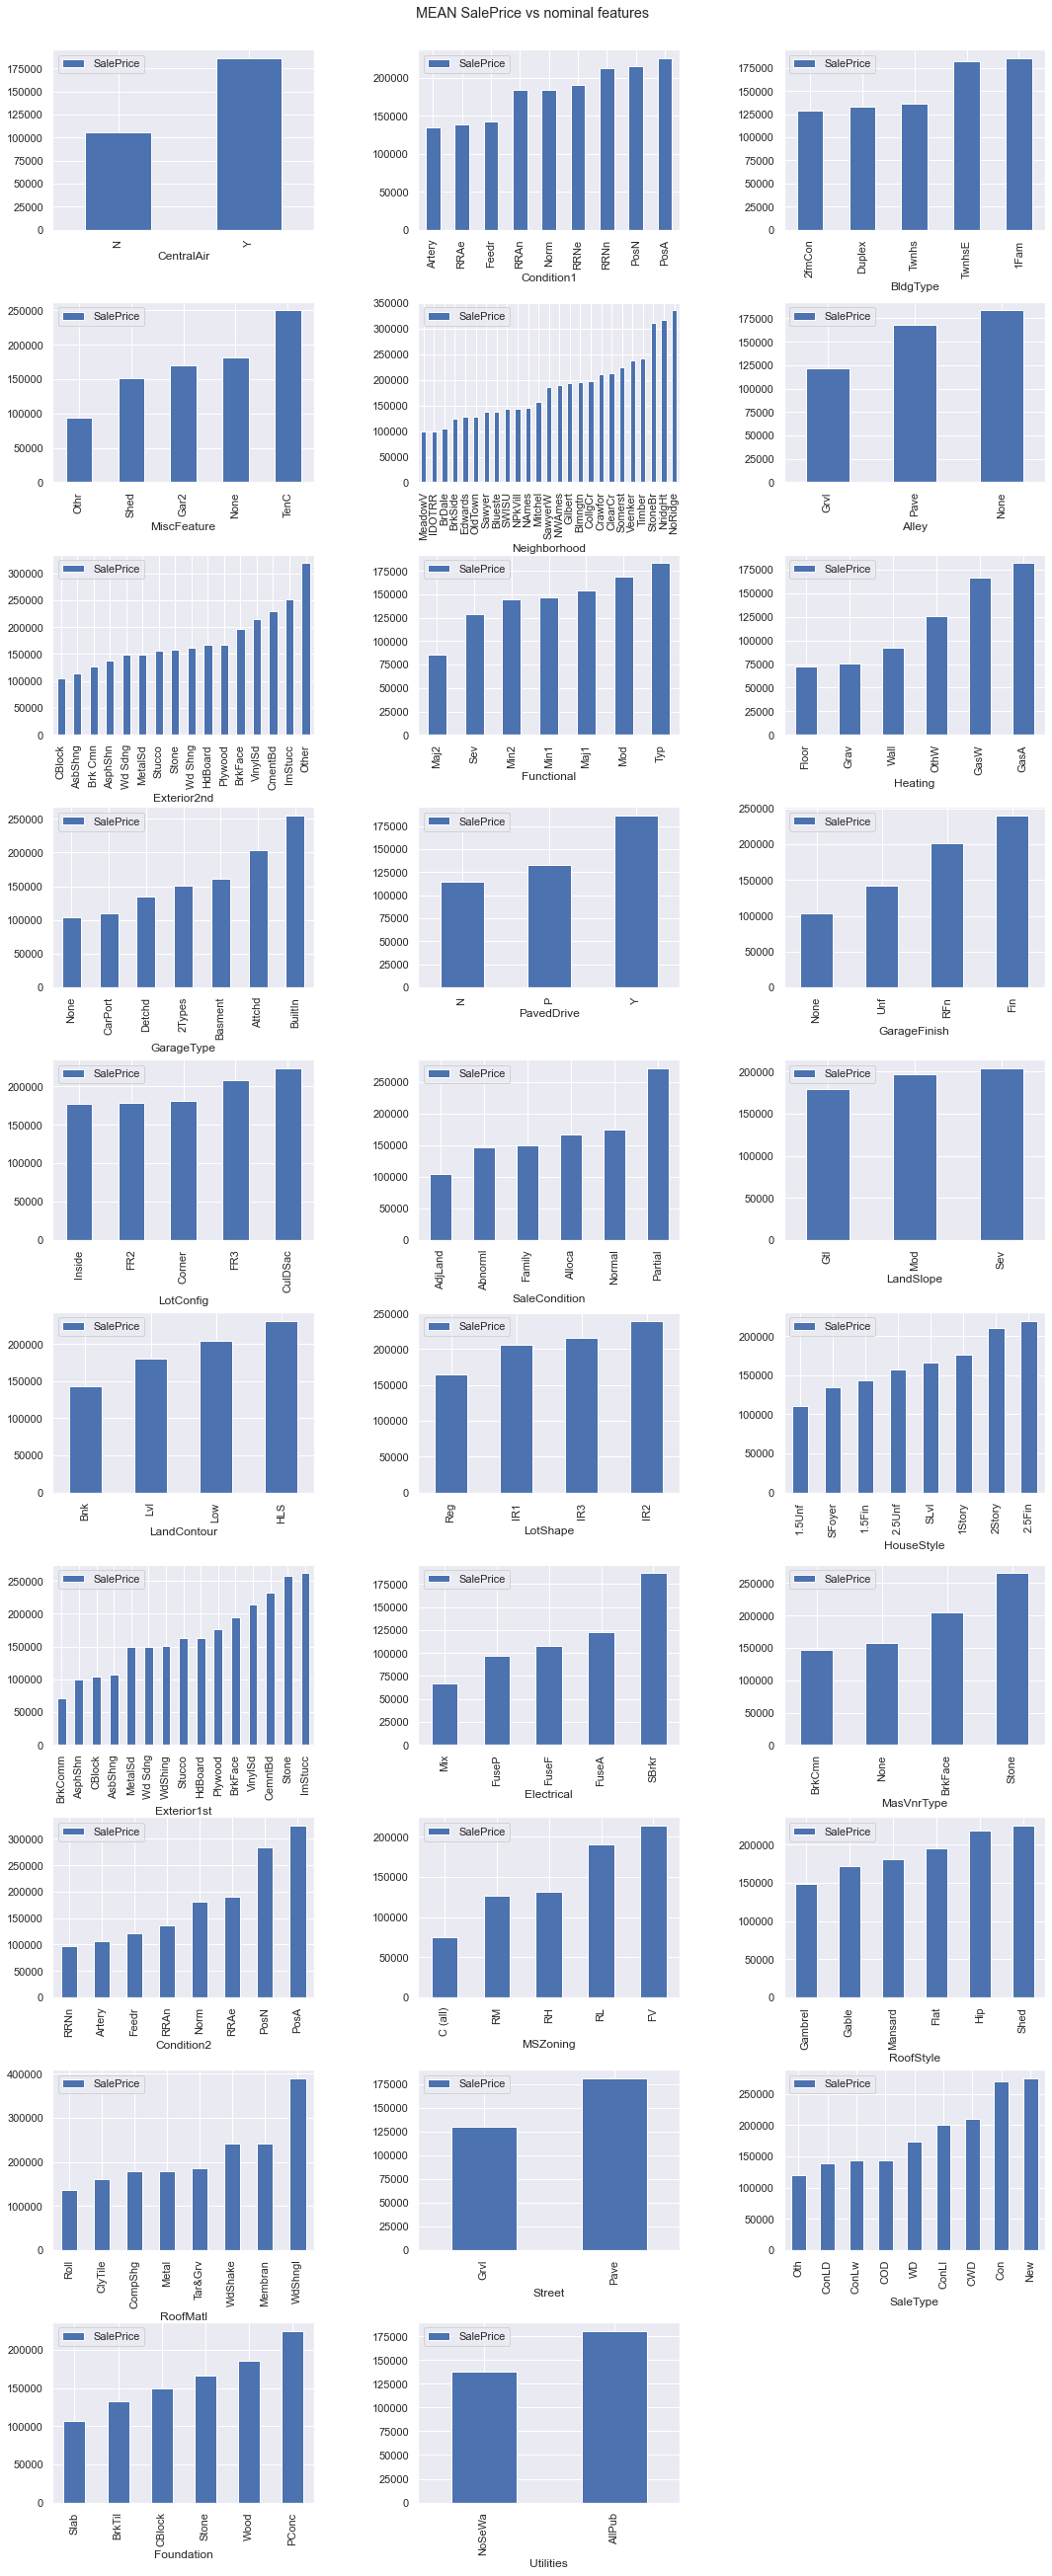

In [40]:
# Observe average sale price of all nominal features

plot_multi_charts(data=house, x_column_list=nominal_cols, y='SalePrice',
                  title='MEAN SalePrice vs nominal features', y_label='SalePrice',plot_type='bar',figsize=(18,120))    

Total cols:  14


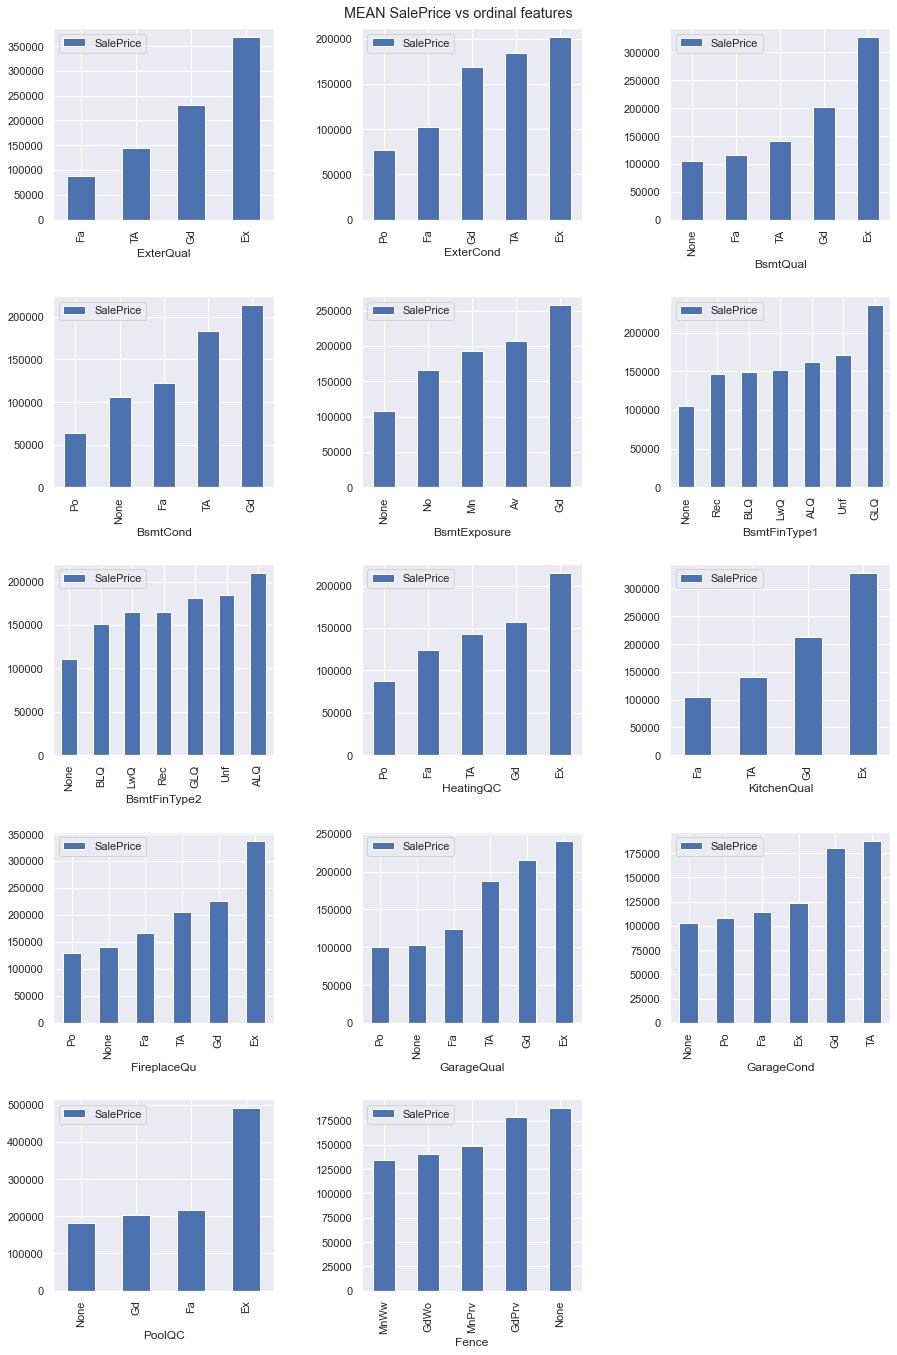

In [41]:
# Observe average sale price of all ordinal features

plot_multi_charts(data=house, x_column_list=ordinal_cols, y='SalePrice', 
                  title='MEAN SalePrice vs ordinal features', y_label='SalePrice',plot_type='bar',figsize=(15,60)) 


### Encode categorical features


In [42]:
# HOT ENCODE nominal cols

house = pd.get_dummies(data = house, columns = nominal_cols)
house.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,Age,YearSinceRemOrBuilt,HighQuality,TotalLivingSF,NeighborhoodPriceSF,CentralAir_N,CentralAir_Y,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Alley_Grvl,Alley_None,Alley_Pave,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Street_Grvl,Street_Pave,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Utilities_AllPub,Utilities_NoSeWa
0,1,60,65.0,8450,7,5,2003,2003,196.0,Gd,TA,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,

In [43]:
# ENCODE CATEGORICAL ORDINAL COLS

def factorize_ordinal_cols(data,cols,cat_list):
    for i in cols: 
        new_col = i + '_rating'
        cat = pd.Categorical(data[i], 
                         categories=cat_list, 
                         ordered=True)
        labels, unique = pd.factorize(cat, sort=True)
        data[new_col] = labels
        

cat1_cols = ['BsmtFinType1','BsmtFinType2']
cat2_cols = ['Fence']
cat3_cols = ['BsmtExposure']
cat4_cols = set(ordinal_cols) - set(cat1_cols) - set(cat2_cols) - set(cat3_cols)

cat1_list = ['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ']       
cat2_list = ['None','MnWw','GdWo','MnPrv','GdPrv']       
cat3_list = ['None','No','Mn','Av','Gd']
cat4_list = ['None','Po','Fa','TA','Gd','Ex']

factorize_ordinal_cols(house,cat1_cols,cat1_list)
factorize_ordinal_cols(house,cat2_cols,cat2_list)
factorize_ordinal_cols(house,cat3_cols,cat3_list)
factorize_ordinal_cols(house,cat4_cols,cat4_list)

# print(labels, unique)
house.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,Age,YearSinceRemOrBuilt,HighQuality,TotalLivingSF,NeighborhoodPriceSF,CentralAir_N,CentralAir_Y,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Alley_Grvl,Alley_None,Alley_Pave,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Street_Grvl,Street_Pave,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Utilities_AllPub,Utilities_NoSeWa,BsmtFinType1_rating,BsmtFinType2_rating,Fence_rating,BsmtExposure_rating,HeatingQC_rating,Exte

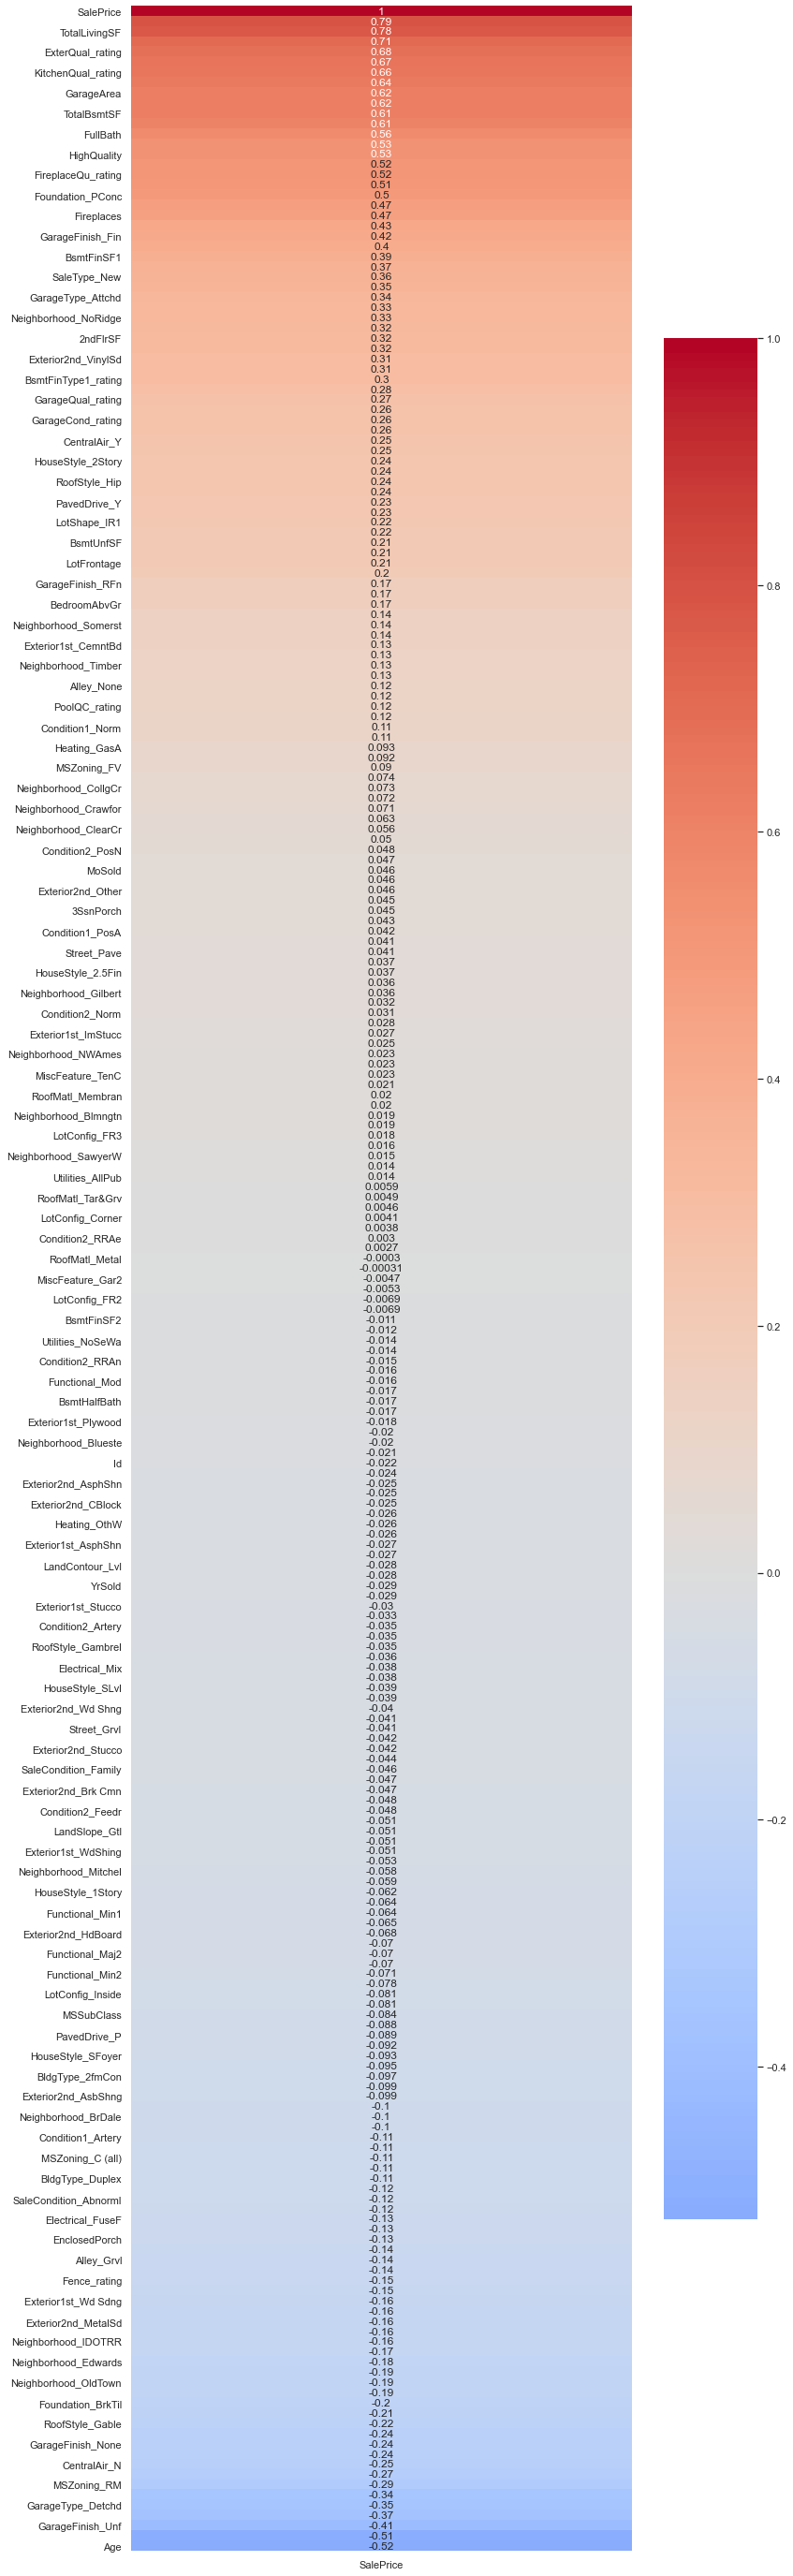

In [44]:
figure = plt.figure(figsize=(12,50))
sns.heatmap(house.corr()[['SalePrice']].sort_values('SalePrice',ascending=False),annot=True, cmap='coolwarm', center=0);


## Were the house prices impacted by financial crisis in 2008?

Comparing mean house price of different year 2006, 2007, 2008 and 2009.

2010 is not taken into the assessment as the data collected are only up to July.

We found that the difference of the mean sale price were not significant:

_ 8703 between mean house price 2007 compare to 2008 

_ 6331 between mean house price 2007 compare to 2009.

The amount of houses sold for each year is quite consistent (reference figure 'Distribution of houses sold by year').

In [45]:
house_by_yearsold = house.groupby('YrSold').agg({'SalePrice':'mean'})
house_by_yearsold

,SalePrice
YrSold,
2006,182549.458599
2007,186063.151976
2008,177360.838816
2009,179432.103550
2010,177393.674286


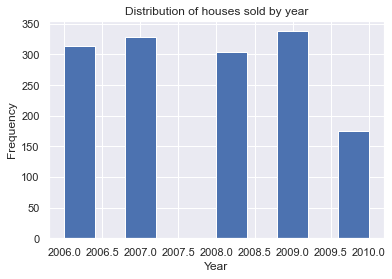

In [46]:

house['YrSold'].plot.hist()
plt.xlabel('Year')
plt.title('Distribution of houses sold by year')
plt.show()

In [47]:
# REMOVE OUTLITERS
# MAKE SALE PRICE AND LOT AREA DISTRIBUTION MORE NORMALISED

# Property with lot area >= 50,000 squarefeet (about 4000 square meters) are likely large pieces of land so we decided to filter them from the dataset

house_filtered = house[(house.LotArea<50000) & (house.SaleCondition_Normal==1)]

In [48]:
house_filtered.shape

(1188, 263)

Text(0.5, 0, 'Sale Price - LotArea < 50,000')

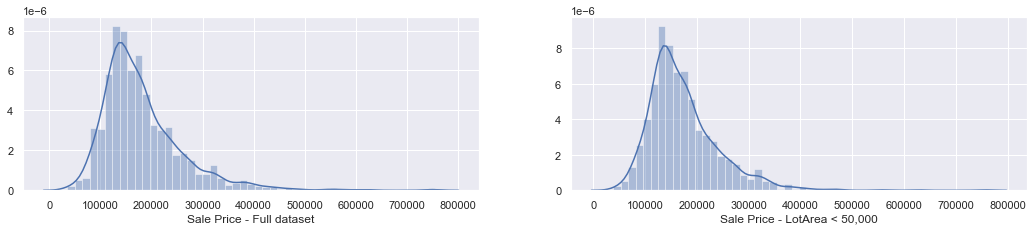

In [49]:
fig = plt.figure(figsize=(18, 7))
ax = fig.add_subplot(2, 2, 1)
sns.distplot(house_raw.SalePrice)
plt.xlabel('Sale Price - Full dataset')
ax = fig.add_subplot(2, 2, 2)
sns.distplot(house_filtered.SalePrice)
plt.xlabel('Sale Price - LotArea < 50,000')

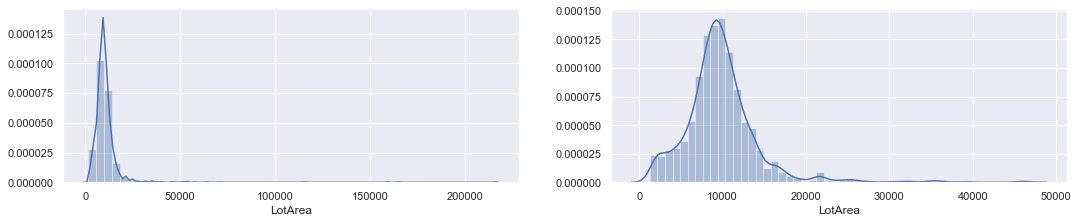

In [50]:
fig = plt.figure(figsize=(18, 7))
ax = fig.add_subplot(2, 2, 1)
sns.distplot(house_raw.LotArea)
ax = fig.add_subplot(2, 2, 2)
sns.distplot(house_filtered.LotArea)

### Building models

To find the adding value of kitchen, we start with creating a linear regression.

Selected features include: 

# LINEAR REGRESSION MODEL

In [51]:
# selection with OveralQual
# cols=['NeighborhoodPriceSF','LotArea','GrLivArea','Age','TotalBsmtSF', 'OverallQual','ExterQual_rating','BsmtUnfSF','BedroomAbvGr','FullBath','HalfBath','GarageCars','KitchenQual_rating','BsmtQual_rating','HeatingQC_rating']

# select all quality related features including:
# 'ExterQual_rating', 'ExterCond_rating', 'BsmtQual_rating', 'BsmtCond_rating', 'BsmtExposure_rating', 'BsmtFinType1_rating', 
# 'BsmtFinType2_rating', 'HeatingQC_rating', 'KitchenQual_rating', 'FireplaceQu_rating', 'GarageQual_rating', 'GarageCond_rating', 'PoolQC_rating', 'Fence_rating'

core_cols =['NeighborhoodPriceSF','LotArea','GrLivArea','Age','TotalBsmtSF', 'BsmtUnfSF','BedroomAbvGr','FullBath','HalfBath','GarageCars']

quality_encoded_cols = [col for col in house if col.endswith('_rating')]

selected_features = core_cols + quality_encoded_cols

print(selected_features)  

# define predictors
X = pd.DataFrame(house_filtered, columns = selected_features)

# define the target variable 
y = house_filtered['SalePrice']

['NeighborhoodPriceSF', 'LotArea', 'GrLivArea', 'Age', 'TotalBsmtSF', 'BsmtUnfSF', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'GarageCars', 'BsmtFinType1_rating', 'BsmtFinType2_rating', 'Fence_rating', 'BsmtExposure_rating', 'HeatingQC_rating', 'ExterCond_rating', 'BsmtCond_rating', 'KitchenQual_rating', 'FireplaceQu_rating', 'PoolQC_rating', 'BsmtQual_rating', 'ExterQual_rating', 'GarageCond_rating', 'GarageQual_rating']


In [52]:
X.shape

(1188, 24)

In [53]:
## LINEAR REGRESSION MODEL
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Create a model for Linear Regression
lg = LinearRegression()

# Fit the model with the Training data
lg.fit(X_train,y_train)

# Make predictions with training and test set
y_pred_train = lg.predict(X_train)
y_pred_test = lg.predict(X_test)
    
# Calculate the score (R^2 for Regression) for Training Data
score_train = lg.score(X_train,y_train)

# Calculate the score (R^2 for Regression) for Testing Data
score_test = lg.score(X_test,y_test)

print('Score_train: ' + str(score_train))
print('Score_test: ' + str(score_test))
print('Rmse_train: ' + str(mean_squared_error(y_train,y_pred_train,squared=False)))
print('Rmse_test: ' + str(mean_squared_error(y_test,y_pred_test,squared=False)))
print('Intercept: ', lg.intercept_)


Score_train: 0.8715133915062339
Score_test: 0.8727705956944047
Rmse_train: 24504.765437483737
Rmse_test: 24352.202630803735
Intercept:  -95614.54975399235


In [54]:
coef_df = pd.DataFrame({'feature': X_train.columns, 'coef':lg.coef_})
coef_df.sort_values('coef',ascending=False).head(40)

,feature,coef
21,ExterQual_rating,15221.326928
17,KitchenQual_rating,12072.435240
19,PoolQC_rating,7361.712723
23,GarageQual_rating,7297.078118
9,GarageCars,6045.371080
15,ExterCond_rating,4711.868444
13,BsmtExposure_rating,4447.571095
20,BsmtQual_rating,3985.431879
8,HalfBath,3315.817937
14,HeatingQC_rating,2155.229829


### WHAT IS KITCHEN ADDING VALUE
Coef value of KitchenQual_rating is 12072. This means every improvement of one unit of kitchen quality rating will add extra $12,072 to the house price.
Kitchen quality rating is from 0,1,2,3 equivalent to Fair, Typical/Average, Good, Excellent.

An average house price of Ames is $180,000. For every increase of kitchen quality rating unit, the adding value will be 6.7% of the house value.

If the cost of a kitchen renovation to upgrade the kitchen quality from Fair (0) to Good (2) is $, the ROI will be:
ROI = (Kitchen quality adding value * 2 - $15000) / 15000 = 60%, adding value will be $24,144 or 13%.

If the cost of a kitchen renovation to upgrade the kitchen quality from Fair (0) to Excellent (3) is $22,000, the ROI will be:
ROI = (Kitchen quality adding value * 3 - $22000) / 22000 = 64%, adding value will be $36216 or 20%

In [ ]:
X.KitchenQual_rating.describe()
print(X.KitchenQual_rating.unique())
print(house.KitchenQual.unique())

[2 1 0 3]
['Gd' 'TA' 'Ex' 'Fa']


### CROSS VALIDATION CHECK

In [39]:
# PLOT FEATURE COEF
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)
    plt.xticks(rotation=90)
    plt.show()

Linear Regression
R2 score:  0.8652250068416093
RMSE:  24638.16049824295


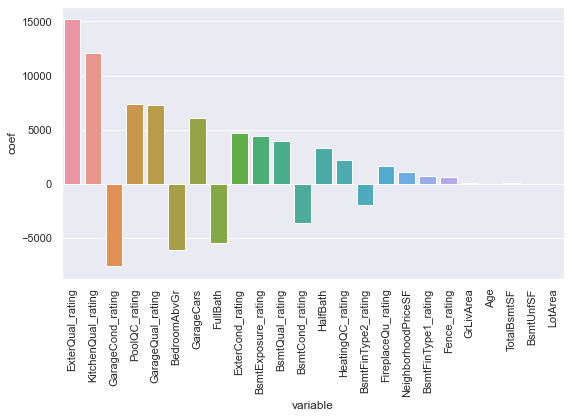

In [40]:
from sklearn.model_selection import cross_val_score

## Get CV score of Linear Model

r2 = cross_val_score(lg, X_test, y_test, cv=5)
rmse = np.sqrt(-cross_val_score(lg, X_test, y_test, scoring="neg_mean_squared_error", cv=5))

print('Linear Regression')
print('R2 score: ', r2.mean())
print('RMSE: ', rmse.mean())

plt.figure(figsize=(9,5))
view_coeff(X_test, lg)

Ridge
Alpha: 22.739657523579275
R2 Score: 0.8742025489671681
RMSE: 26785.61081619704


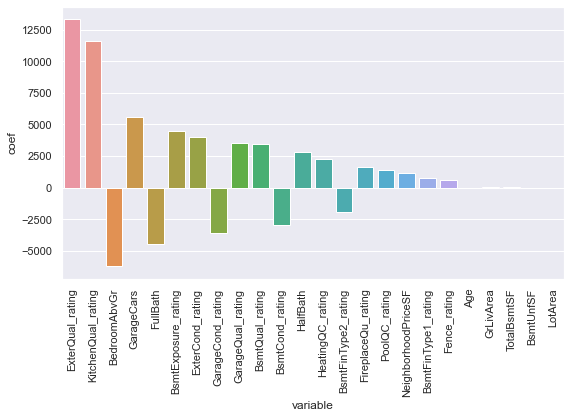

In [41]:
## Calculate Ridge Regression model

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)
    
optimal_ridge = RidgeCV(alphas=ridge_alphas, store_cv_values=True)
optimal_ridge.fit(X_train, y_train)

print('Ridge')
print('Alpha:', optimal_ridge.alpha_)
print('R2 Score:', optimal_ridge.score(X_test, y_test))
print('RMSE:', np.sqrt(optimal_ridge.cv_values_.mean()))
 
plt.figure(figsize=(9,5))
view_coeff(X_test, optimal_ridge)


Lasso
Alpha: 138.26221737646534
R2 Score: 0.8747333884329673
RMSE: 27164.022331139746


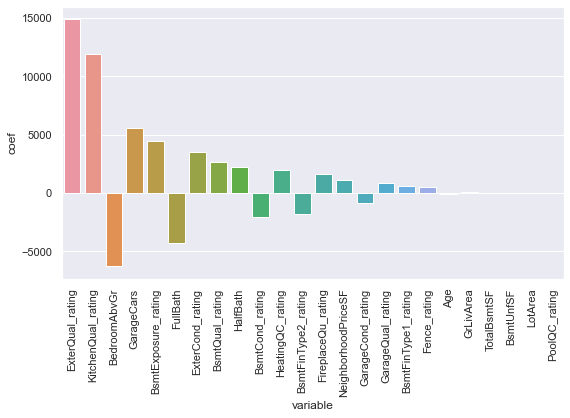

In [42]:
## Calculate Lasso Regression model

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6,6,200)

optimal_lasso = LassoCV(alphas=lasso_alphas, cv=5)
optimal_lasso.fit(X_train, y_train)

print('Lasso')
print('Alpha:', optimal_lasso.alpha_)
print('R2 Score:', optimal_lasso.score(X_test, y_test))
print('RMSE:', np.sqrt(optimal_lasso.mse_path_.mean()))
                   
plt.figure(figsize=(9,5))
view_coeff(X_test, optimal_lasso)



# COMPARE MODELS

Linear Regession cv_rsme: 24638

Ridge cv_rsme: 26785

Lasso cv_rsme: 27164

Linear Regession performs best among three models with lowest cv_rsme.

## HYPOTHESIS testing on correlation between kitchen quality and sale price 

In [ ]:
X.head()

,Neighborhood_valueIndex,LotArea,GrLivArea,Age,TotalBsmtSF,OverallQual,ExterQual_rating,BsmtUnfSF,BedroomAbvGr,FullBath,HalfBath,GarageCars,KitchenQual_rating,BsmtQual_rating,HeatingQC_rating
0,74.457240,8450,1710,5,856,7,2,150,3,2,1,2,2,3,4
1,78.080229,9600,1262,31,1262,6,1,284,3,2,0,2,1,3,4
2,74.457240,11250,1786,7,920,7,2,434,3,2,1,2,2,3,4
4,79.825258,14260,2198,8,1145,8,2,490,4,2,1,3,2,3,4
5,67.366071,14115,1362,16,796,5,1,64,1,1,1,2,1,3,4


In [43]:
# Null Hypothesis Dictionary
null_hypothesis = {
    'H0': "House price does not increase for house with higher quality kitchen."
    , 'H1': "House price increases for house with higher quality kitchen."
}

def print_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    '''
#     print(p_value,alpha)
    if p_value < alpha:
        print("We reject our null hypothesis.")
        print(null_hypothesis['H1'])
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
        print(null_hypothesis['H0'])
    else:
        print("Our test is inconclusive.")

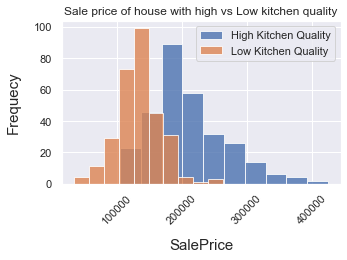

t = 19.447036296173337
p = 1.2062453694314018e-65
We reject our null hypothesis.
House price increases for house with higher quality kitchen.


In [92]:
house_stat = house[(house.LotArea > 7000) & (house.LotArea < 11000)]

N = 300
high_kitchen = house_stat[house_stat['KitchenQual_rating'] > 1]['SalePrice'].sample(N,random_state=42)
low_kitchen = house_stat[house_stat['KitchenQual_rating'] <= 1]['SalePrice'].sample(N,random_state=42)

fig = plt.figure(figsize=(5,3))
plt.hist(high_kitchen,alpha=0.8)
plt.hist(low_kitchen,alpha=0.8)
plt.xlabel('{}'.format('SalePrice'), size=15,labelpad=12.5)
plt.ylabel('Frequecy', size=15, labelpad=12.5)
plt.legend(['High Kitchen Quality','Low Kitchen Quality'])
plt.xticks(rotation=45)
plt.title('Sale price of house with high vs Low kitchen quality')
plt.show()
fig.savefig('High vs low kitchen quality.png',transparent=False, bbox_inches='tight', dpi=300)

alpha = 0.05

t, p = stats.ttest_ind(high_kitchen, low_kitchen)
print("t = " + str(t))
print("p = " + str(p))
print_sig(p, alpha)

## Checking feature importance

                feature      score
17        PoolQC_rating   0.209707
11  BsmtFinType2_rating   0.254878
21     ExterCond_rating   2.214554
12         Fence_rating  14.426717
6          BedroomAbvGr  40.808871
14      BsmtCond_rating  43.456185
5             BsmtUnfSF  64.448313
16    GarageCond_rating  72.655758
22    GarageQual_rating  78.044931
8              HalfBath  78.095039


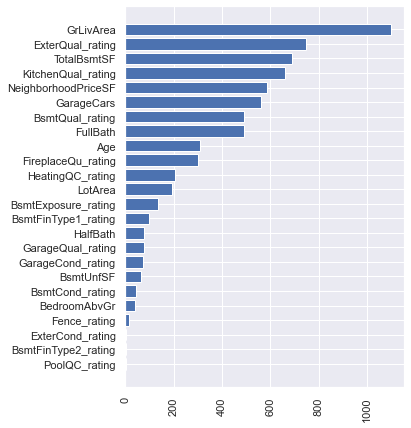

In [88]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

score_dict = dict(zip(X.columns,fs.scores_))

score_df = pd.DataFrame(score_dict.items(), columns=['feature', 'score'])
score_df = score_df.sort_values('score',ascending=True)
print(score_df.head(10))
    
# plot the scores
fig = plt.figure(figsize=(5,7))
plt.barh(score_df.feature, score_df.score)
plt.xticks(rotation=90)
plt.show()

figname = 'Feature importance.png'
fig.savefig(figname,transparent=False, bbox_inches='tight', dpi=300)


Features with highest scores are GrLivArea, ExterQual_rating, TotalBsmtSF, KitchenQual_rating and NeighborhoodPriceSF.
This indicates the house's living size, external material quality, basement size, kitchen and location have the most influences on the house price of Ames between 2007 - 2010.